In [1]:
#import the required libraries
import os
import csv
import requests
import json as json
import pandas as pd
from pandas.io.json import json_normalize
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


In [ ]:
#Counts the number of books from 11/1/2019. Over 1.4 million
https://data.seattle.gov/resource/6vkj-f5xf.json?$select=count(BibNum)&reportdate=2019-11-01T00:00:00.000
#get list of neighborhoods
https://data.seattle.gov/resource/6vkj-f5xf.json?$query=select distinct ItemLocation
#See number by a neightborhood
https://data.seattle.gov/resource/6vkj-f5xf.json?$select=count(BibNum)&ItemLocation=cen
#I think we need: col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm (Madrona Sally Goaldman for central).
#None in Laurelhusrt
#This returns counts by location:
https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$group=ItemLocation

#Not sure if this works    
https://data.seattle.gov/resource/6vkj-f5xf.json?$query=select count(BibNum) where ItemLocation=col OR ItemLocation=mon
    
    

## Open json file

In [5]:
#Open up the same file for reading
with open("SPL-bibCOUNTS-2019-12-07.json", "r") as read_file: #Replace this with the filename of your choice
    j = json.load(read_file)
count=len(d)

## Get the number of books in branches
col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm (Madrona Sally Goaldman for central).
None in Laurelhusrt

In [19]:
#This gets the recent ones
r=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$where=reportdate="2019-12-01T00:00:00.000"&$group=ItemLocation') #build string according to SOCRATA's convention to get public data assets
#THis one gets all:
#r=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$group=ItemLocation') #build string according to SOCRATA's convention to get public data assets
j=json.loads(r.text) #parse the json into a list named j

## Save the json file

In [20]:
#j[0] #view the first record
with open('SPL-bibCOUNTS-'+str(datetime.datetime.now().strftime("%Y-%m-%d"))+'.json', "w") as write_file:
    json.dump(j, write_file)
d = j
count = len(d)

## Get the count of books in your branches
The variable is totalbooks

In [21]:
#col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm
d = j #create a json file to mess with

branches=[] #dim list as a empty list

for c in d:  #d is the dictionary of parsed json
        if c['ItemLocation']=='col':
            branches.append(c['count_BibNum'])
        if c['ItemLocation']=='mon':
            branches.append(c['count_BibNum'])
        if c['ItemLocation']=='qna':
            branches.append(c['count_BibNum'])
        if c['ItemLocation']=='gwd':
            branches.append(c['count_BibNum'])
        if c['ItemLocation']=='nga':
            branches.append(c['count_BibNum'])
        if c['ItemLocation']=='uni':
            branches.append(c['count_BibNum'])
        if c['ItemLocation']=='net':
            branches.append(c['count_BibNum'])
        if c['ItemLocation']=='mgm':
            branches.append(c['count_BibNum'])

print("List built:", len(branches),"elements") #print how many elements are in dtlist

List built: 8 elements


In [22]:
#Convert the dictionary to a dataframe
bibcts = pd.DataFrame(branches, columns=['bibcount'])
bibcts = pd.to_numeric(bibcts['bibcount'])
bibcts.head(10)

0    33865
1    51887
2    10416
3    16389
4    61275
5    33788
6    23810
7    29451
Name: bibcount, dtype: int64

In [23]:
totalbooks=bibcts.sum()
totalbooks

260881

# Retrieve Recent Records

## Open previous json

In [27]:
#Open up the  for reading
with open("SPL-Data-2019-12-07.json", "r") as read_file: #Replace this with the filename of your choice
    l = json.load(read_file)
count=len(l)
count

## Collect the data

In [24]:
#col, mon, qna, GWD or gwd? (I think gwd), nga, uni AND net, mgm
#This works in browser: https://data.seattle.gov/resource/6vkj-f5xf.json?$where=ItemLocation= 'col' or ItemLocation='mon' or ItemLocation='qna' or ItemLocation='gwd' or ItemLocation='mgm' or ItemLocation='nga' or ItemLocation='uni' or ItemLocation='net' and reportdate='2019-11-01T00:00:00.000'&$limit=
#This gets the recent ones
s=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$where=ItemLocation= "col" or ItemLocation="mon" or ItemLocation="qna" or ItemLocation="gwd" or ItemLocation="mgm" or ItemLocation="nga" or ItemLocation="uni" or ItemLocation="net"and reportdate="2019-12-01T00:00:00.000"&$limit='+str(totalbooks)) #build string according to SOCRATA's convention to get public data assets
#THis one gets all:
#r=requests.get('https://data.seattle.gov/resource/6vkj-f5xf.json?$select=ItemLocation,count(BibNum)&$group=ItemLocation') #build string according to SOCRATA's convention to get public data assets
l=json.loads(s.text) #parse the json into a list named j

## Save the json file

In [26]:
with open('SPL-Data-'+str(datetime.datetime.now().strftime("%Y-%m-%d"))+'.json', "w") as write_file:
    json.dump(l, write_file)

count = len(l)
count

In [22]:
l[0:9]

[{'bibnum': '3170898',
  'title': 'Baseball world series / Matt Christopher.',
  'author': 'Christopher, Matt, 1917-1997',
  'isbn': '0316220469, 9780316220460',
  'publicationyear': '2014.',
  'publisher': 'Little, Brown and Company,',
  'subjects': 'Little League World Series Baseball Juvenile fiction, Baseball Fiction, Cousins Juvenile fiction, Friendship Juvenile fiction',
  'itemtype': 'jcbk',
  'itemcollection': 'ncfic',
  'floatingitem': 'NA',
  'itemlocation': 'gwd',
  'reportdate': '2019-12-01T00:00:00.000',
  'itemcount': '1'},
 {'bibnum': '1969431',
  'title': 'Spot can count / Eric Hill.',
  'author': 'Hill, Eric, 1927-2014',
  'isbn': '0399234543',
  'publicationyear': '[1999]',
  'publisher': "G.P. Putnam's Sons,",
  'subjects': 'Dogs Fiction, Domestic animals Juvenile fiction, Counting Fiction, Toy and movable books Juvenile fiction',
  'itemtype': 'jcbk',
  'itemcollection': 'ncspec',
  'floatingitem': 'NA',
  'itemlocation': 'nga',
  'reportdate': '2019-12-01T00:00:00.

# Create CSV
dataframe is df

In [25]:
metadata=open('SPL-Data-'+str(datetime.datetime.now().strftime("%Y-%m-%d"))+'.csv', 'w', newline='', encoding='utf-8')
csv.writer(metadata).writerow(['bibnum','title','author','isbn','publicationyear','itemtype','itemcollection','itemlocation'])

for i in l:
    csv.writer(metadata).writerow([i['bibnum'],
        i.get('title'),
        i.get('author'),
        i.get('isbn'),
        i.get('publicationyear'),
        i.get('itemtype'),
        i['itemcollection'],
        i['itemlocation']])                                   
        #i.get('isbn'), #For any of these .get(), adding ",'N/A'" will fill the null cells with 'N/A'. However, metadata assessment counts non nulls
                                   

metadata.close() #Close the output file, release all locks

#Open up the same file as a dataframe. Encode cp1252 avoids a utf-8 error.
df = pd.read_csv('SPL-Data-'+str(datetime.datetime.now().strftime("%Y-%m-%d"))+'.csv',encoding='utf-8')

print('The resulting dataframe has',len(df),' rows')

The resulting dataframe has 260881  rows


In [40]:
df.head(1)

,bibnum,title,author,isbn,publicationyear,itemtype,itemcollection,itemlocation
0,3170898,Baseball world series / Matt Christopher.,"Christopher, Matt, 1917-1997","0316220469, 9780316220460",2014.,jcbk,ncfic,gwd


## Open data dictionary file to map fiction/nonfiction and media type

In [32]:
dftype = pd.read_csv('SPL-datadict-type.csv',encoding='utf-8')
dftype.head(2)

,itemtype,format
0,acart,Art
1,acphoto,Art


In [34]:
#Create a new dataframe with the data dictionary info. Inner join is intersection so removes rows with no partner in other dataframe
dfall = pd.merge(df, dftype, on='itemtype', how='inner')

In [42]:
dfcol = pd.read_csv('SPL-datadict-collection.csv',encoding='utf-8')
dfcol.head(2)

,itemcollection,type
0,ncenf,Nonfiction
1,cabob,NaN


In [44]:
#Create a new dataframe with the data dictionary info. Inner join is intersection so removes rows with no partner in other dataframe
dfall = pd.merge(dfall, dfcol, on='itemcollection', how='inner')

In [47]:
dfall.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 260881 entries, 0 to 260880
Data columns (total 10 columns):
bibnum             260881 non-null int64
title              260877 non-null object
author             220170 non-null object
isbn               226298 non-null object
publicationyear    260694 non-null object
itemtype           260881 non-null object
itemcollection     260881 non-null object
itemlocation       260881 non-null object
format             260863 non-null object
type               260105 non-null object
dtypes: int64(1), object(9)
memory usage: 21.9+ MB


## Pare down to books

In [168]:
dfbook = dfall.loc[dfall['format']=='Book']


In [164]:
dfbook.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 209154 entries, 0 to 260872
Data columns (total 10 columns):
bibnum             209154 non-null int64
title              209150 non-null object
author             199910 non-null object
isbn               208093 non-null object
publicationyear    208991 non-null object
itemtype           209154 non-null object
itemcollection     209154 non-null object
itemlocation       209154 non-null object
format             209154 non-null object
type               208659 non-null object
dtypes: int64(1), object(9)
memory usage: 17.6+ MB


## Add neighborhood column

In [169]:
dfhood = pd.read_csv('neighborhoods.csv',encoding='utf-8')
dfhood.head(2)

,itemlocation,neighborhood,count
0,col,Columbia City,1
1,mon,Montlake,1


In [170]:
#Create a new dataframe with the data dictionary info. Inner join is intersection so removes rows with no partner in other dataframe
dfbook = pd.merge(dfbook, dfhood, on='itemlocation', how='inner')
dfbook.head()

,bibnum,title,author,isbn,publicationyear,itemtype,itemcollection,itemlocation,format,type,neighborhood,count
0,3170898,Baseball world series / Matt Christopher.,"Christopher, Matt, 1917-1997","0316220469, 9780316220460",2014.,jcbk,ncfic,gwd,Book,Fiction,Phinney-Greenwood,1
1,3104433,"Thor's serpents / K.L. Armstrong, M.A. Marr.","Armstrong, Kelley","0316204951, 9780316204934, 9780316204958",2015.,jcbk,ncfic,gwd,Book,Fiction,Phinney-Greenwood,1
2,3236757,The goldfish boy / Lisa Thompson.,"Thompson, Lisa (Lisa Anne), 1973-","1338053922, 9781338053920",[2017],jcbk,ncfic,gwd,Book,Fiction,Phinney-Greenwood,1
3,3338931,Winterhouse / Ben Guterson ; with illustration...,"Guterson, Ben","1250123887, 9781250123886",2018.,jcbk,ncfic,gwd,Book,Fiction,Phinney-Greenwood,1
4,3280467,Thornhill / Pam Smy.,"Smy, Pam","162672654X, 9781626726543",2017.,jcbk,ncfic,gwd,Book,Fiction,Phinney-Greenwood,1


# Start Analysis
on dataframe dbook

In [143]:
#Get a csv of the unique year values to look at problem values
dfyears = dfbook.publicationyear.unique()
dfyears = pd.DataFrame(dfyears)
dfyears.to_csv('SPLyears.csv', mode = 'w', index=False)

In [136]:
#Make sure all values are string (?) then get rid of all '[c', 'Â©' and then the rest of the brackets 
dfbook['publicationyear']= dfbook['publicationyear'].astype(str)
dfbook['publicationyear'] =  dfbook['publicationyear'].apply(lambda x: x.replace('[c',''),'')
#dfbook['publicationyear'] =  dfbook['publicationyear'].apply(lambda x: x.replace('Â©',''),'')
dfbook['publicationyear'] =  dfbook['publicationyear'].apply(lambda x: x.replace('[','').replace(']','')) 
#dfbook['publicationyear'] = preg_replace("/(©|&copy;|&#169;)/", "", dfbook['publicationyear'])
#dfbook['publicationyear'] = str_replace(array('©'), array(''), dfbook['publicationyear'])

C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [137]:
#The year values are very difficult- lots of non numeric characters.
#Use: https://realpython.com/python-data-cleaning-numpy-pandas/#combining-str-methods-with-numpy-to-clean-columns

#reg expression: r'^(\d{4})'  This takes the first four numeric digits.  Everything else goes to NaN
extr = dfbook['publicationyear'].str.extract(r'^(\d{4})', expand=False)
extr.head()

0    2014
1    2015
2    1994
3    2008
4    2017
Name: publicationyear, dtype: object

In [138]:
#Convert to numeric and show datatype
dfbook['publicationyear'] = pd.to_numeric(extr)
dfbook['publicationyear'].dtype

C:\Users\Andre\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


dtype('float64')

In [139]:
#What percent are Nan?
dfbook['publicationyear'].isnull().sum() / len(dfbook)

0.1675703070464825

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Year Published')]

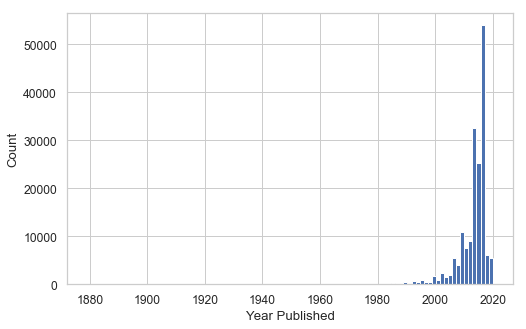

In [156]:
#Histogram of year published using mtlabplot
#yrhist = bks['yrpub'].plot.hist(bins=50)
#Same thing using seaborn
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    dfbook['publicationyear'], norm_hist=False, kde=False, bins=100, hist_kws={"alpha": 1}
).set(xlabel='Year Published', ylabel='Count')

# Set up a dataframe with SPL data by neighborhood
fiction/nonfiction, percent childrens, There is no Laurelhurst branch!!

In [158]:
dfbook.type.unique()

array(['Fiction', nan, 'Nonfiction', 'Language', 'Reference'],
      dtype=object)

In [177]:
#Set up a dataframe with the percent fiction

#Groups count by Neighborhood, and type, calculates percent
bksfiction = dfbook.groupby(['neighborhood', 'type'])['count'].sum().reset_index() #total of each category
bksfiction['total'] = bksfiction.groupby('neighborhood')['count'].transform('sum') #Inserts total count for the neighborhood for each type in each neighborhood 
bksfiction['percent'] = bksfiction['count']/bksfiction['total']


#Select fiction
fic = bksfiction.loc[bksfiction['type']=='Fiction']
fic.head(8)

,neighborhood,type,count,total,percent
0,Central District,Fiction,6885,9679,0.711334
3,Columbia City,Fiction,18519,33417,0.554179
7,Montlake,Fiction,10656,16966,0.628080
10,Northgate,Fiction,20272,33916,0.597712
14,Phinney-Greenwood,Fiction,29032,53296,0.544731
18,Queen Anne,Fiction,13147,23297,0.564322
21,Ravenna,Fiction,20989,38088,0.551066


In [178]:
#Save csv file for further testing: 
dfbook.to_csv('SPL-dfbook.csv', mode = 'w', index=False)